In [1]:
from wikiData import children, elements, dictParents

from novel import novel
from greedysum import greedysum
from greedymerge import greedymerge
from lpCoverage import solveLP, localSearch

In [2]:
import time
start = time.time()
localSearch(10, 5, children, elements, dictParents, 0.2)
print time.time() - start

Running greedy for seed solution...
233488
21523
1729542
60876
669675
1579244
98770
190837
2649330
12424
Running local search...
First round sol:
['233488', '21523', '1729542', '60876', '669675', '1579244', '98770', '190837', '2649330', '12424']
0
Second round sol:
[['1579244', '233488', '21523', '1729542', '60876'], ['233488', '21523', '1729542', '669675', '1579244'], ['233488', '21523', '1729542', '60876', '669675'], ['233488', '98770', '2649330', '21523', '1729542'], ['233488', '669675', '1579244', '98770', '21523'], ['233488', '1579244', '21523', '60876', '1729542'], ['233488', '21523', '1729542', '60876', '669675'], ['233488', '669675', '1729542', '60876', '21523'], ['233488', '21523', '1729542', '60876', '669675'], ['21523', '1729542', '233488', '669675', '60876'], ['233488', '1579244', '21523', '669675', '1729542'], ['233488', '21523', '1729542', '60876', '669675'], ['190837', '12424', '21523', '233488', '1729542'], ['233488', '21523', '1729542', '60876', '669675'], ['60876', '9

In [3]:
solution = []
runtime = []
calls = []

k = 5

Lvalues = [5]
for l in range(10,40,10):
    Lvalues.append(l)

for l in Lvalues:
    novS, bestS, novCost, novEvals = novel(l, k, children, elements, dictParents)
    gsS, gsCost, gsEvals = greedysum(l, k, children, elements, dictParents)
    gmS, gmCost, gmEvals = greedymerge(l, k, children, elements, dictParents)
    lsS = localSearch(l, k, children, elements, dictParents, 0.2)
    
    solution.append([novCost, gsCost, gmCost, lsS])
    
    print ""
    print "Done for l = ", l
    print "\n\n\n"

We obtained value  377
sanity check:
['233488', '21523', '1729542', '60876', '669675'] 5 True 0
['233488', '21523', '1729542', '60876', '669675'] 5 True 29
['233488', '21523', '1729542', '60876', '669675'] 5 True 5
['233488', '21523', '1729542', '60876', '669675'] 5 True 4
['233488', '21523', '1729542', '60876', '669675'] 5 True 24
['233488', '21523', '1729542', '60876', '669675'] 5 True 9
['233488', '21523', '1729542', '60876', '669675'] 5 True 4
['233488', '21523', '1729542', '60876', '669675'] 5 True 9
['233488', '21523', '1729542', '60876', '669675'] 5 True 1
['233488', '21523', '1729542', '60876', '669675'] 5 True 91
['233488', '21523', '1729542', '60876', '669675'] 5 True 55
['233488', '21523', '1729542', '60876', '669675'] 5 True 3
['233488', '21523', '1729542', '60876', '669675'] 5 True 16
['233488', '21523', '1729542', '60876', '669675'] 5 True 2
['233488', '21523', '1729542', '60876', '669675'] 5 True 51
['233488', '21523', '1729542', '60876', '669675'] 5 True 26
['233488', '

In [4]:
novSol = []
gsSol = []
gmSol = []
lsSol = []

for sol in solution:
    novSol.append(sol[0] + 1)
    gsSol.append(sol[1])
    gmSol.append(sol[2] + 2)
    lsSol.append(sol[3])
    
print len(novSol)

4


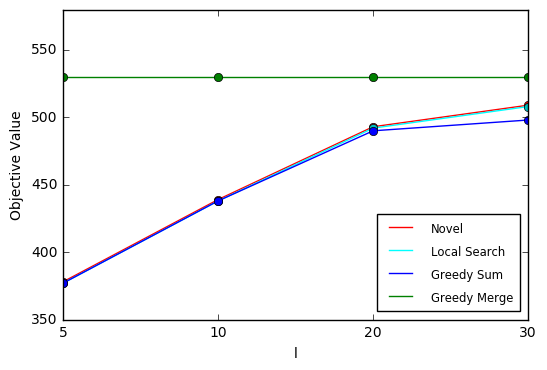

In [5]:
import matplotlib.pyplot as plt

ax = plt.subplot(111)

# http://matplotlib.org/users/text_intro.html
ax.set_xlabel('l')
ax.set_ylabel('Objective Value')

plt.ylim(350,580)
plt.xlim(0,len(novSol)-1)
labels = [l for l in Lvalues]

x = [i for i in range(len(novSol))]


plt.xticks(x, labels)

plt.plot(novSol, c = 'red', label = 'Novel')
plt.plot(novSol, 'ro')

plt.plot(lsSol, c = 'cyan', label = 'Local Search')
plt.plot(lsSol, 'co')

plt.plot(gsSol, c = 'blue', label = 'Greedy Sum')
plt.plot(gsSol, 'bo')

plt.plot(gmSol, c = 'green', label = 'Greedy Merge')
plt.plot(gmSol, 'go')

# http://matplotlib.org/1.3.0/examples/pylab_examples/legend_demo.html
legend = ax.legend(loc='lower right')

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('small')



plt.show()

In [6]:
# from novel import novel

# novS, novCost, novEvals = novel(l, k, children, elements, dictParents)

# print novS, novCost, novEvals

In [7]:
# from greedysum import greedysum

# gsS, gsCost, gsEvals = greedysum(l, k, children, elements, dictParents)

In [8]:
# from greedymerge import greedymerge

# gmS, gmCost, gmEvals = greedymerge(l, k, children, elements, dictParents)

In [9]:
# from lpCoverage import solveLP

# solveLP(l, k, children, elements, dictParents, l*0.75, k*0.75)